In [26]:
import pickle
import numpy as np
import pandas as pd
from utils import *
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
GENES = ["breast", "colon", "head", "kidneyc", "kidneyp", "liver", "lunga", "lungs", "prostate", "stomach", "thyroid","uterine"]


def load_cancer_data():
    layers = ["breast", "colon", "head", "kidneyc", "kidneyp", "liver", "lunga", "lungs", 
              "prostate", "stomach", "thyroid","uterine"]
    data_path = r"../data/"
    data ={}
    
    for lay in layers:
        data[lay] = np.loadtxt(data_path + lay +".txt")
    
    pair = list(itertools.product(layers,layers))
    pair = [list(x) for x in pair]
    for item in pair:
        if item[0]==item[1]:
            pair.remove(item)
            
    allcomb = []
    for i in range(len(layers)):
        a=[layers[i]]+[x for x in layers if x not in [layers[i]]]
        allcomb.append(a)
            
    return data, layers, pair, allcomb
              
data1, layers1, pair1, allcomb1 = load_cancer_data()

In [7]:
path = r"C:\Users\hexie\OneDrive\Desktop\Projects\ecology\cancer\prediction_data\\"
single = []
double = []
for i in range(5):
    temp = np.loadtxt(path+"single_10_" + str(i) + ".txt") 
    single.append(temp)
    temp = np.loadtxt(path+"double_10_" + str(i) + ".txt") 
    double.append(temp)

In [13]:
single1 = np.mean(single, axis = 0)
double1 = np.mean(double, axis = 0)

In [23]:
mat = np.array_split(double1, 12)
mat_for_heat = []
for i,m in enumerate(mat):
    m = m.tolist()
    m.insert(i,single1[i])
    mat_for_heat.append(m)

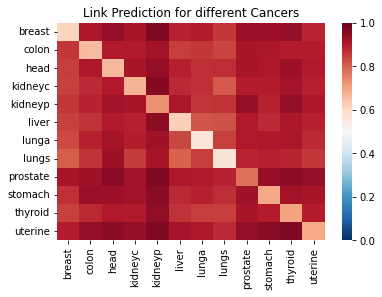

In [36]:
ax = sns.heatmap(mat_for_heat, robust=True, xticklabels=GENES, yticklabels=GENES, fmt="f", cmap='RdBu_r', vmin=0, vmax=1)
plt.title("Link Prediction for different Cancers")
plt.savefig('prediction_heatmap.pdf', bbox_inches='tight')

In [35]:
value = single1.tolist()+double1.tolist()
columns = ["AUC"]
index = layers1+[str(x[0]) + "_" + str(x[1]) for x in pair1]
df2 = pd.DataFrame(value, index, columns)
df2.to_csv('link_prediction.csv')  